## Análisis exploratorio datos preparados.

El proposito de este notebook es utilizar el dataset generado en el primer proceso de preparación de datos para realizar analisis exploratorio en los datos, graficas, correlaciones y poder establecer tecnicas para el uso o arreglo de datos.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Extracción datos.

In [6]:
siniestros = pd.read_csv('Prepared_Data/siniestros-prepared.csv')

In [7]:
siniestros.shape

(203191, 29)

In [8]:
siniestros.columns

Index(['Unnamed: 0', 'KEYID', 'FECHA', 'DIA_PROCESADO', 'EDAD_PROCESADA',
       'LLEVACINTURON', 'LLEVACHALECO', 'LLEVACASCO', 'SEXO',
       'GRAVEDAD_PROCESADA', 'ESTABASERVICIOOFICIAL', 'MODELOVEHICULO',
       'CLASEVEHICULO', 'SERVICIOVEHICULO', 'POSSESEGURORESPONSABILIDAD',
       'TIPOFALLA', 'VEHICULO_VIAJABA_CLASIFICADO', 'CON_BICICLETA',
       'CON_EMBRIAGUEZ', 'CON_HUECOS', 'CON_PEATON', 'GRAVEDADCOD',
       'CLASECODIGO', 'CHOQUECODIGO', 'DIRECCION', 'LOCALIDAD',
       'HORA_PROCESADA', 'TIPODISENNO', 'VICTIMAS'],
      dtype='object')

### Cantidad de siniestros por gravedad.

In [162]:
gragpcoun = siniestros.groupby(['GRAVEDADCOD']).size().reset_index(name='CANTIDAD')
gragpcoun

,GRAVEDADCOD,CANTIDAD
0,1,2267
1,2,57965
2,3,142959


In [163]:
lstgrave = ['Con Muertos','Con Heridos','Solo Daños']

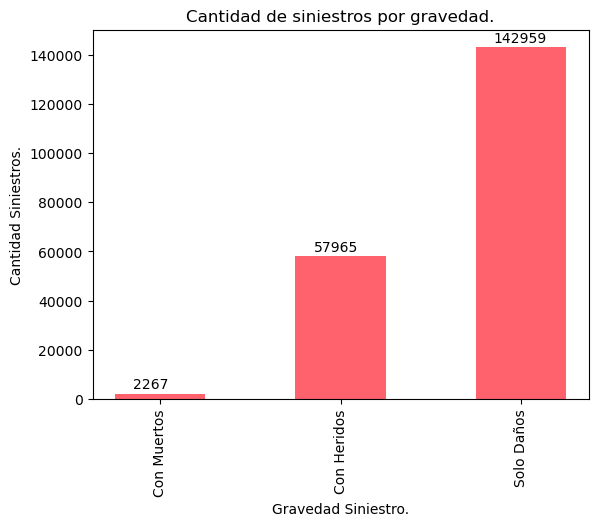

In [166]:
plt.figure()
plt.bar(lstgrave, gragpcoun['CANTIDAD'], width=0.5, color='#FF616D')
plt.title("Cantidad de siniestros por gravedad.")
plt.ylabel("Cantidad Siniestros.")
plt.xlabel("Gravedad Siniestro.")
plt.xticks(rotation=90)
lstcant = gragpcoun['CANTIDAD'].to_numpy()

for i in range(len(lstcant)):
    plt.annotate(lstcant[i], (i-0.15, 2000+lstcant[i]))

plt.show()
plt.close()

In [107]:
gracogpcoun = siniestros.groupby(['GRAVEDAD_PROCESADA']).size().reset_index(name='CANTIDAD')
gracogpcoun = gracogpcoun.sort_values(by=['CANTIDAD'], ascending=True)
gracogpcoun

,GRAVEDAD_PROCESADA,CANTIDAD
3,MUERTA,664
0,HERIDO HOSPITALIZADO,1407
1,HERIDO VALORADO,23785
2,ILESA,177335


In [133]:
lstCantidad = gracogpcoun['GRAVEDAD_PROCESADA'].to_numpy()
lstCantidad

array(['MUERTA', 'HERIDO HOSPITALIZADO', 'HERIDO VALORADO', 'ILESA'],
      dtype=object)

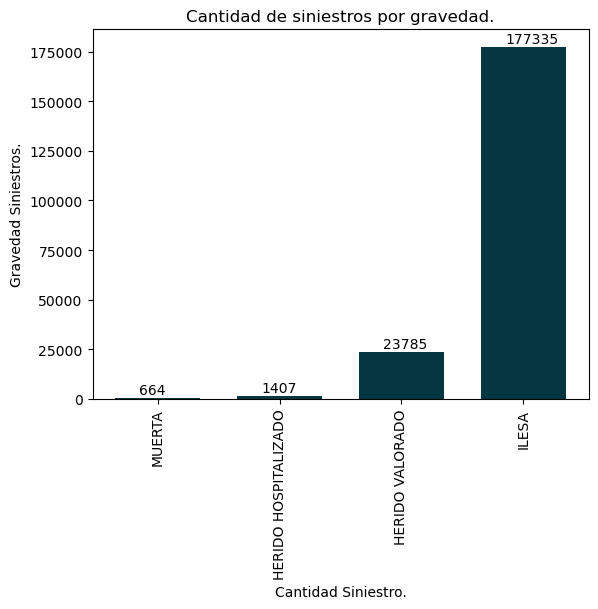

In [155]:
plt.figure()
plt.bar(gracogpcoun['GRAVEDAD_PROCESADA'], gracogpcoun['CANTIDAD'], width=0.7, color='#053742')
plt.title("Cantidad de siniestros por gravedad.")
plt.ylabel("Gravedad Siniestros.")
plt.xlabel("Cantidad Siniestro.")
plt.xticks(rotation=90)
lstcant = gracogpcoun['CANTIDAD'].to_numpy()
lstgrave = gracogpcoun['GRAVEDAD_PROCESADA'].to_numpy()

for i in range(len(lstcant)):
    plt.annotate(lstcant[i], (i-0.15, 2000+lstcant[i]))

plt.show()
plt.close()

In [97]:
siniestros[['GRAVEDAD_PROCESADA','GRAVEDADCOD']].value_counts()

GRAVEDAD_PROCESADA    GRAVEDADCOD
ILESA                 3              142954
                      2               33110
HERIDO VALORADO       2               23488
HERIDO HOSPITALIZADO  2                1367
ILESA                 1                1271
MUERTA                1                 664
HERIDO VALORADO       1                 292
HERIDO HOSPITALIZADO  1                  40
HERIDO VALORADO       3                   5
dtype: int64

In [31]:
142959 + 57965 +2267

203191

In [32]:
177335 + 33110 + 23488 + 1367+ 1271 + 664 +292+ 40 +5

237572